In [58]:
# 기존 데이터를 학습하고 예측된 데이터를 함께 시각화하는 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 기존데이터 불러서 정상화하기

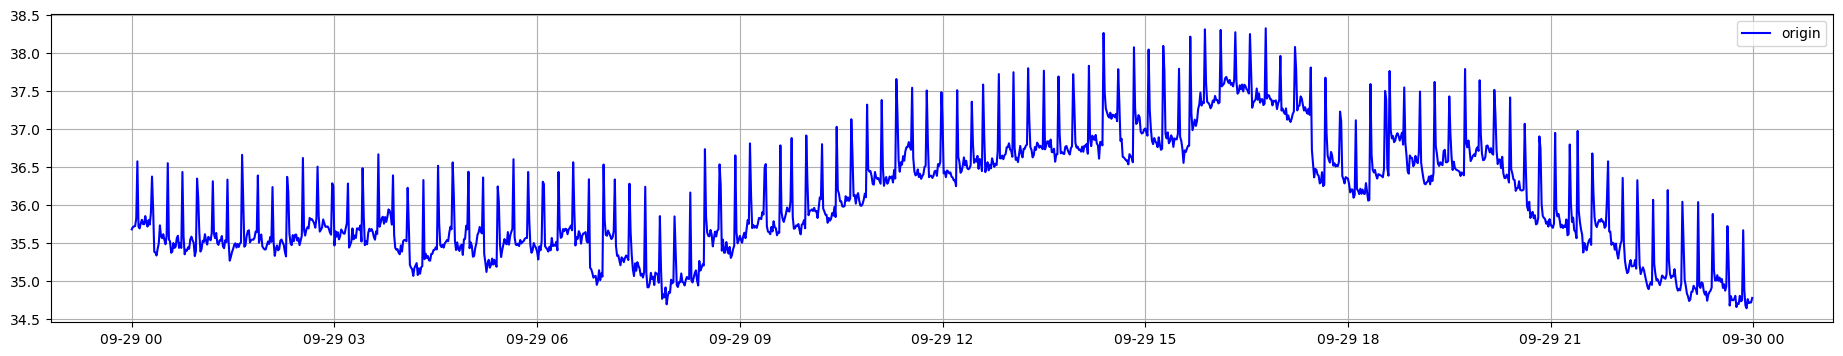

In [129]:
# test_df = pd.read_csv('sim/camera_10_sim.csv', parse_dates=['_time'], index_col='_time')[-1440:]
# increment_values_2 = np.sqrt(np.linspace(0, 1, len(selected_data_2))) * -50


test_df = pd.read_csv('origin_data.csv', parse_dates=['_time'], index_col='_time')
plt.figure(figsize=(23,4))
plt.plot(test_df.index, test_df, label='origin', color='blue')
plt.legend()
plt.grid()
plt.show()

## StandardScaler를 사용하여 데이터 정규화

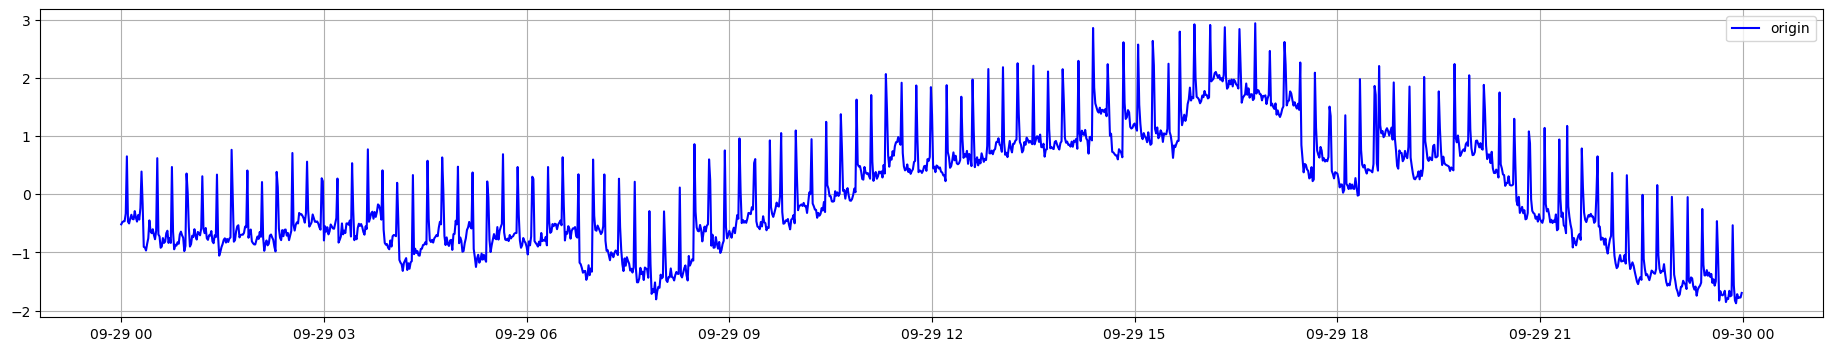

In [130]:
scaler = StandardScaler()
_value_scaled = scaler.fit_transform(test_df[['_value']])  # 꼭 2D로 넣기
test_df['_value'] = _value_scaled.flatten()

plt.figure(figsize=(23,4))
plt.plot(test_df.index, test_df, label='origin', color='blue')
plt.legend()
plt.grid()
plt.show()

## 이상데이터 추가(상승, 하락구간)

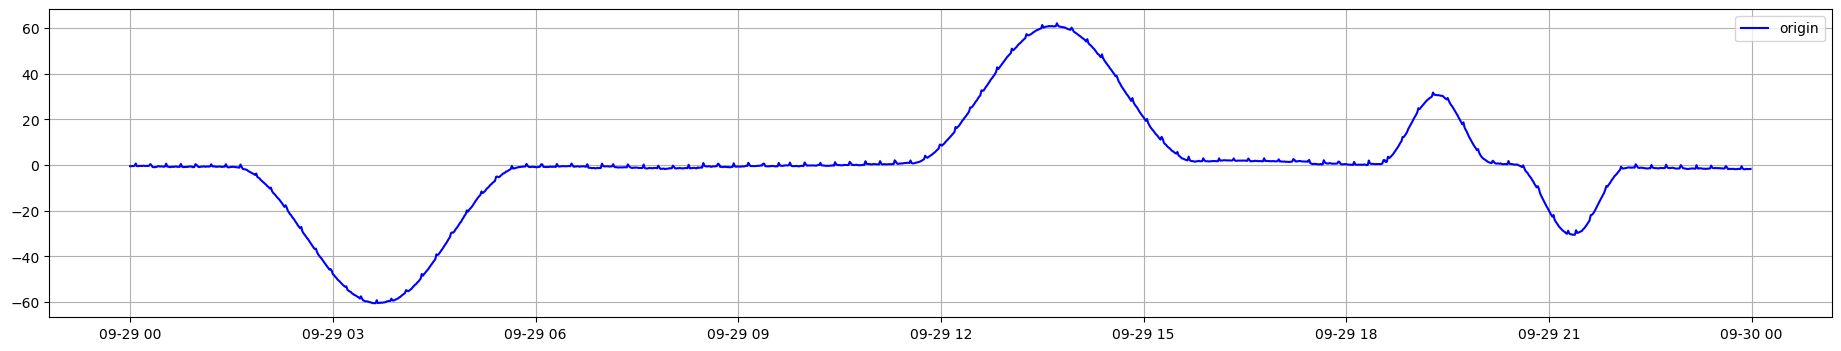

In [131]:
test_df_edit1 = test_df.copy()
###### 하락구간설정
# 이상데이터 2 증가 (완만한 상승)
start_time_3 = '2024-09-29 01:30:00+09:00'
end_time_3 = '2024-09-29 03:40:00+09:00'
selected_data_3 = test_df_edit1.loc[start_time_3:end_time_3]

n = len(selected_data_3)
# cos 함수로 부드러운 상승 곡선 만들기
increment_values_3 = (1 - np.cos(np.linspace(0, np.pi, n))) / 2 * -60  # 0 → 60
test_df_edit1.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values + increment_values_3

# 이상데이터 2 감소 (완만한 하강)
start_time_3 = '2024-09-29 03:40:05+09:00'
end_time_3 = '2024-09-29 05:50:00+09:00'
selected_data_3 = test_df_edit1.loc[start_time_3:end_time_3]

n = len(selected_data_3)
# cos 함수로 부드러운 하강 곡선 만들기
increment_values_3 = (1 + np.cos(np.linspace(0, np.pi, n))) / 2 * +60  # 60 → 0
test_df_edit1.loc[start_time_3:end_time_3, '_value'] = selected_data_3['_value'].values - increment_values_3

###### 상스구간설정정
# 이상데이터 2 증가 (완만한 상승)
start_time_4 = '2024-09-29 11:30:00+09:00'
end_time_4 = '2024-09-29 13:40:00+09:00'
selected_data_4 = test_df_edit1.loc[start_time_4:end_time_4]

n = len(selected_data_4)
# cos 함수로 부드러운 상승 곡선 만들기
increment_values_3 = (1 - np.cos(np.linspace(0, np.pi, n))) / 2 * 60  # 0 → 60
test_df_edit1.loc[start_time_4:end_time_4, '_value'] = selected_data_4['_value'].values + increment_values_3

# 이상데이터 2 감소 (완만한 하강)
start_time_4 = '2024-09-29 13:40:05+09:00'
end_time_4 = '2024-09-29 15:50:00+09:00'
selected_data_4 = test_df_edit1.loc[start_time_4:end_time_4]

n = len(selected_data_4)
# cos 함수로 부드러운 하강 곡선 만들기
increment_values_3 = (1 + np.cos(np.linspace(0, np.pi, n))) / 2 * -60  # 60 → 0
test_df_edit1.loc[start_time_4:end_time_4, '_value'] = selected_data_4['_value'].values - increment_values_3





###### 상스구간설정정
# 이상데이터 2 증가 (완만한 상승)
start_time_5 = '2024-09-29 18:30:00+09:00'
end_time_5 = '2024-09-29 19:20:00+09:00'
selected_data_5 = test_df_edit1.loc[start_time_5:end_time_5]

n = len(selected_data_5)
# cos 함수로 부드러운 상승 곡선 만들기
increment_values_3 = (1 - np.cos(np.linspace(0, np.pi, n))) / 2 * 30  # 0 → 30
test_df_edit1.loc[start_time_5:end_time_5, '_value'] = selected_data_5['_value'].values + increment_values_3

# 이상데이터 2 감소 (완만한 하강)
start_time_5 = '2024-09-29 19:20:05+09:00'
end_time_5 = '2024-09-29 20:10:00+09:00'
selected_data_5 = test_df_edit1.loc[start_time_5:end_time_5]

n = len(selected_data_5)
# cos 함수로 부드러운 하강 곡선 만들기
increment_values_3 = (1 + np.cos(np.linspace(0, np.pi, n))) / 2 * -30  # 30 → 0
test_df_edit1.loc[start_time_5:end_time_5, '_value'] = selected_data_5['_value'].values - increment_values_3

###### 상스구간설정정
# 이상데이터 2 증가 (완만한 상승)
start_time_6 = '2024-09-29 20:30:00+09:00'
end_time_6 = '2024-09-29 21:20:00+09:00'
selected_data_6 = test_df_edit1.loc[start_time_6:end_time_6]

n = len(selected_data_6)
# cos 함수로 부드러운 상승 곡선 만들기
increment_values_3 = (1 - np.cos(np.linspace(0, np.pi, n))) / 2 * -30  # 0 → 30
test_df_edit1.loc[start_time_6:end_time_6, '_value'] = selected_data_6['_value'].values + increment_values_3

# 이상데이터 2 감소 (완만한 하강)
start_time_6 = '2024-09-29 21:20:05+09:00'
end_time_6 = '2024-09-29 22:10:00+09:00'
selected_data_6 = test_df_edit1.loc[start_time_6:end_time_6]

n = len(selected_data_6)
# cos 함수로 부드러운 하강 곡선 만들기
increment_values_3 = (1 + np.cos(np.linspace(0, np.pi, n))) / 2 * 30  # 30 → 0
test_df_edit1.loc[start_time_6:end_time_6, '_value'] = selected_data_6['_value'].values - increment_values_3



plt.figure(figsize=(23,4))
plt.plot(test_df_edit1.index, test_df_edit1, label='origin', color='blue')
plt.legend()
plt.grid()
plt.show()

## 이상데이터 추가(노이즈)

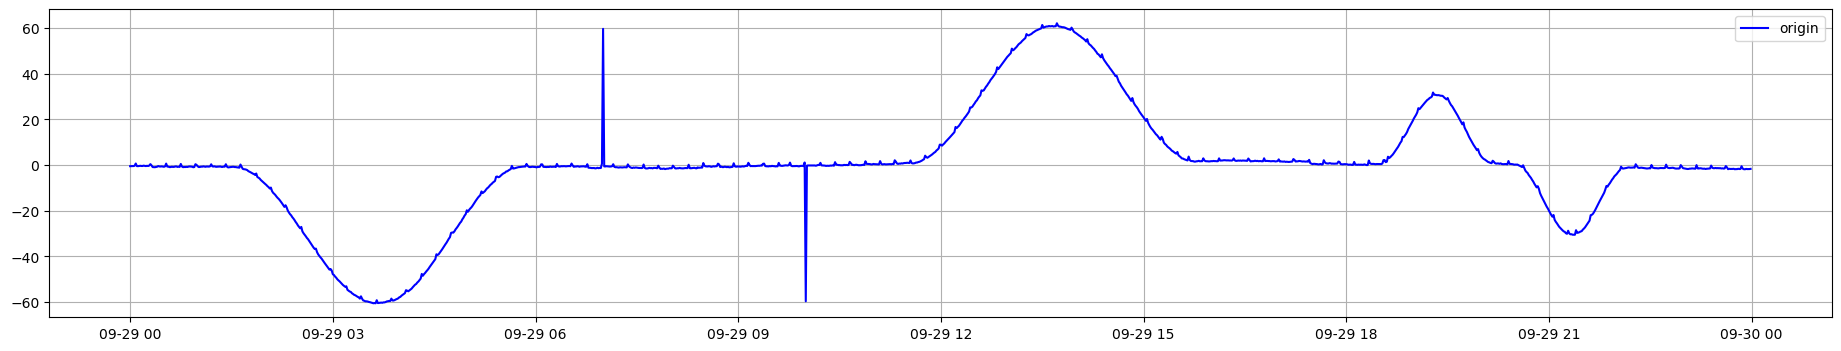

In [133]:
test_df_edit2 = test_df_edit1.copy()
spike_time = '2024-09-29 07:00:00+09:00'
test_df_edit2.loc[spike_time, '_value'] += 60  # 50만큼 급상승
spike_time = '2024-09-29 10:00:00+09:00'
test_df_edit2.loc[spike_time, '_value'] -= 60  # 50만큼 급상승

plt.figure(figsize=(23,4))
plt.plot(test_df_edit2.index, test_df_edit2, label='origin', color='blue')
plt.legend()
plt.grid()
plt.show()

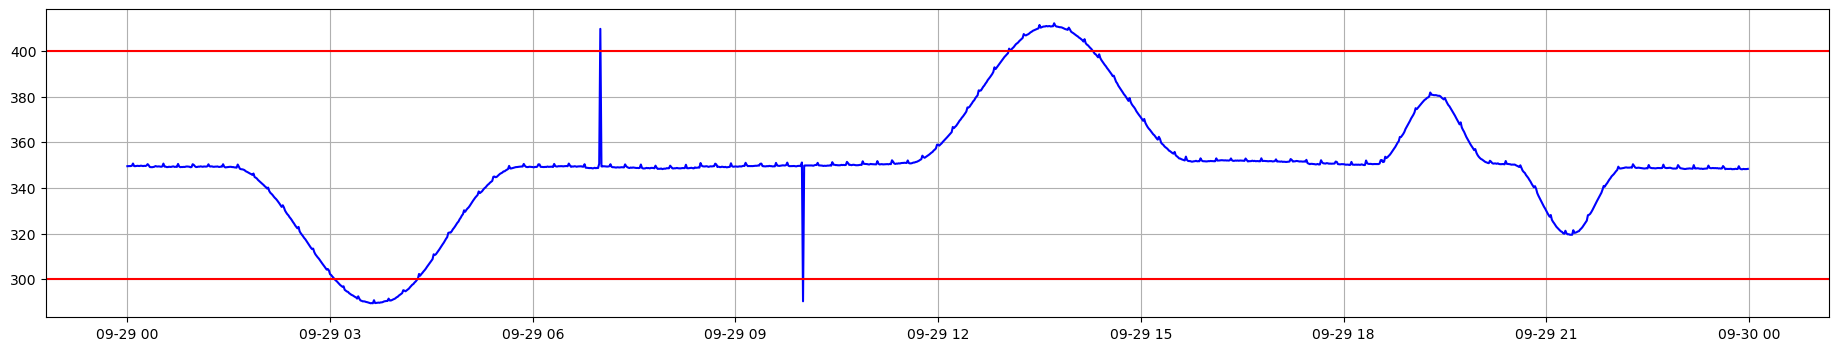

In [120]:
final_test_df = test_df_edit2.copy()
final_test_df['_value'] = final_test_df['_value']+350
plt.figure(figsize=(23,4))
plt.plot(final_test_df.index, final_test_df, label='origin', color='blue')
plt.axhline(300, color='red')
plt.axhline(400, color='red')
plt.grid()
plt.show()

In [122]:
final_test_df.to_csv('test_data.csv', index=True, index_label='_time')